Libraries

In [304]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

Open swingers files

In [305]:
swingers_bd = pd.read_csv('../../../data/Swingers BD.csv')
swingers_da = pd.read_csv('../../../data/Swingers DA.csv')
swingers_ba = pd.read_csv('../../../data/Swingers BA.csv')

# print total
print(f"Number of BD swingers: {len(swingers_bd)}")
print(f"Number of DA swingers: {len(swingers_da)}")
print(f"Number of BA swingers: {len(swingers_ba)}")

Number of BD swingers: 5324
Number of DA swingers: 8303
Number of BA swingers: 3699


Open vulnerability files

In [306]:
# read json
with open('../../../data/tweets_vips_annotated.json') as f:
    propaganda_tweets = json.load(f)

with open('../../../data/propaganda_swingers.json') as f:
    vulnerable_swingers = json.load(f)

Merge with metadata

In [307]:
# count how many tweets are propaganda
propaganda_tweets_count = 0
for tweet in propaganda_tweets:
    if 'annotations' in propaganda_tweets[tweet]:
        propaganda_tweets_count += 1

print(f"Number of propaganda tweets: {propaganda_tweets_count}")

Number of propaganda tweets: 11849


# General swing patterns

In [308]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

## Before-during

In [309]:
# within the swingers before-during, find those that retweet a propaganda tweet before
bd_vulnerable_before = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BD" and user[2] < start_during:
            bd_vulnerable_before.append([user[0], tweet])

print(f"Number of BD swingers that retweet propaganda before: {len(bd_vulnerable_before)}")

Number of BD swingers that retweet propaganda before: 6300


In [310]:

bd_vulnerable_during = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BD" and user[2] >= start_during and user[2] < start_after:
            bd_vulnerable_during.append([user[0], tweet])

print(f"Number of BD swingers that retweet propaganda during: {len(bd_vulnerable_during)}")

Number of BD swingers that retweet propaganda during: 3389


## During-after


In [311]:
da_vulnerable_during = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="DA" and user[2] >= start_during and user[2] < start_after:
            da_vulnerable_during.append([user[0], tweet])

print(f"Number of DA swingers that retweet propaganda during: {len(da_vulnerable_during)}")

Number of DA swingers that retweet propaganda during: 24290


In [312]:
da_vulnerable_after = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="DA" and user[2] >= start_after:
            da_vulnerable_after.append([user[0], tweet])

print(f"Number of DA swingers that retweet propaganda after: {len(da_vulnerable_after)}")

Number of DA swingers that retweet propaganda after: 18582


## Before-after

In [313]:
ba_vulnerable_before = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BA" and user[2] < start_during:
            ba_vulnerable_before.append([user[0], tweet])

print(f"Number of BA swingers that retweet propaganda before: {len(ba_vulnerable_before)}")

Number of BA swingers that retweet propaganda before: 41332


In [314]:
ba_vulnerable_after = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BA" and user[2] >= start_after:
            ba_vulnerable_after.append([user[0], tweet])

print(f"Number of BA swingers that retweet propaganda after: {len(ba_vulnerable_after)}")

Number of BA swingers that retweet propaganda after: 18419


In general, all swinger groups tend to retweet more propaganda before the swing. The highest ratio is 2.25 times more before the swing in the before-after group.

# Focus on techniques

## Before-during

Which techniques are swingers from before to during more vulnerable to?

In [316]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_before_annotations = []
for user in bd_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#bd_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_before_annotations]

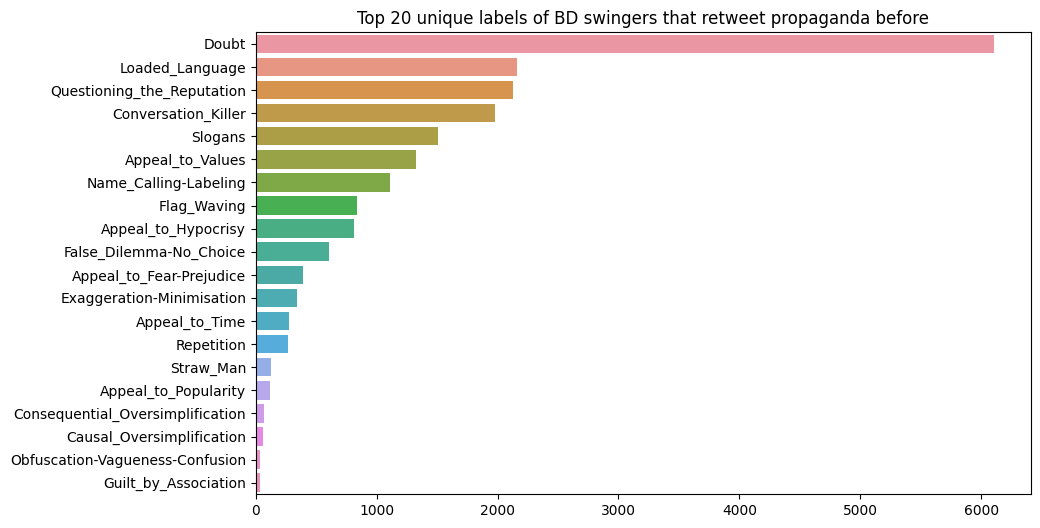

In [317]:
# explode the list of labels and count the occurrences
bd_vulnerable_before_labels = [label for sublist in bd_vulnerable_before_annotations for label in sublist[1]]
bd_vulnerable_before_labels_count = pd.Series(bd_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_before_labels_count[:20], y=bd_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BD swingers that retweet propaganda before')
plt.show()

In [318]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_during_annotations = []
for user in bd_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [319]:
#bd_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_during_annotations]

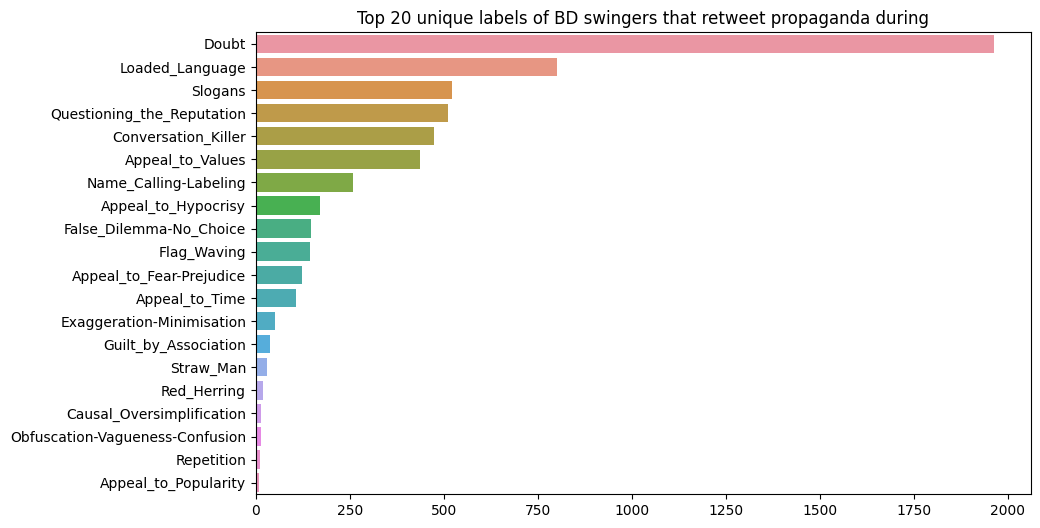

In [320]:
# explode the list of labels and count the occurrences
bd_vulnerable_during_labels = [label for sublist in bd_vulnerable_during_annotations for label in sublist[1]]
bd_vulnerable_during_labels_count = pd.Series(bd_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_during_labels_count[:20], y=bd_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of BD swingers that retweet propaganda during')
plt.show()

## During-after

In [321]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_during_annotations = []
for user in da_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [322]:
#da_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_during_annotations]

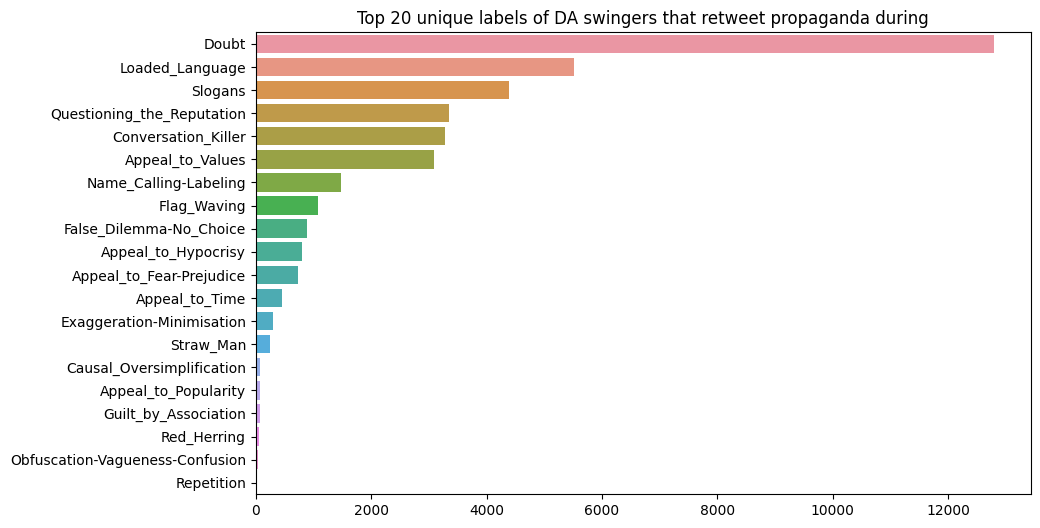

In [323]:
# explode the list of labels and count the occurrences
da_vulnerable_during_labels = [label for sublist in da_vulnerable_during_annotations for label in sublist[1]]
da_vulnerable_during_labels_count = pd.Series(da_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_during_labels_count[:20], y=da_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda during')
plt.show()

In [324]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_after_annotations = []
for user in da_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [325]:
#da_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_after_annotations]

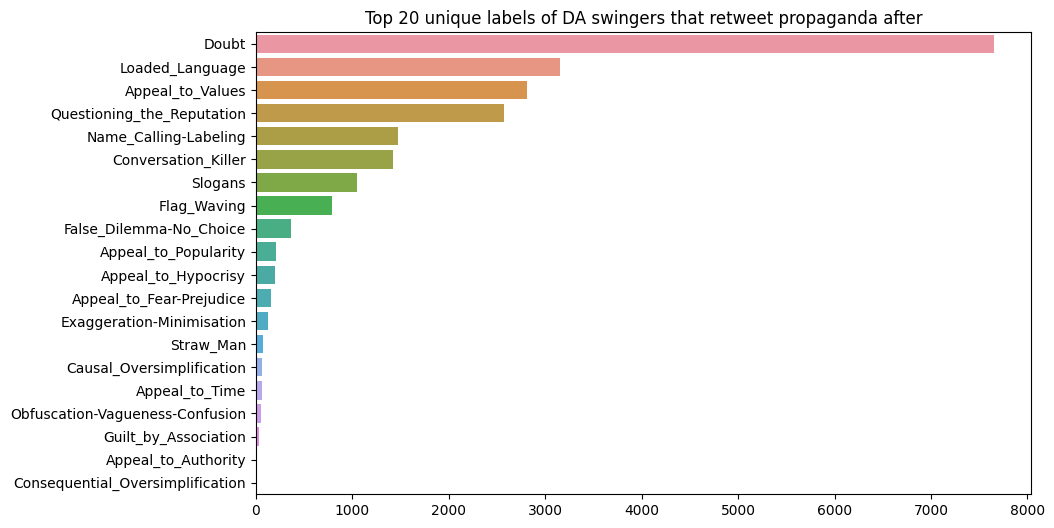

In [326]:
# explode the list of labels and count the occurrences
da_vulnerable_after_labels = [label for sublist in da_vulnerable_after_annotations for label in sublist[1]]
da_vulnerable_after_labels_count = pd.Series(da_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_after_labels_count[:20], y=da_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda after')
plt.show()

## Before-after

In [327]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_before_annotations = []
for user in ba_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [328]:
#ba_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_before_annotations]

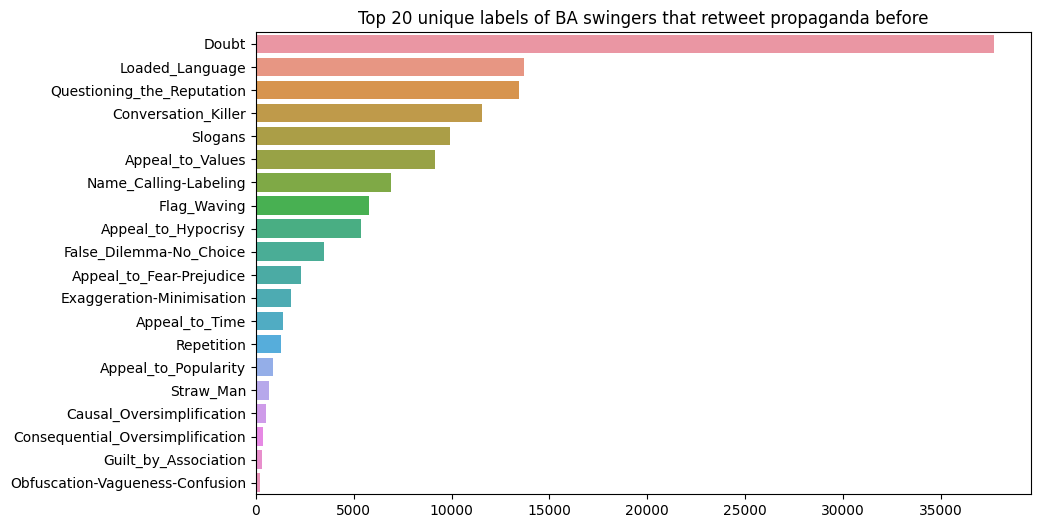

In [329]:
# explode the list of labels and count the occurrences
ba_vulnerable_before_labels = [label for sublist in ba_vulnerable_before_annotations for label in sublist[1]]
ba_vulnerable_before_labels_count = pd.Series(ba_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_before_labels_count[:20], y=ba_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda before')
plt.show()

In [330]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_after_annotations = []
for user in ba_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [331]:
#ba_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_after_annotations]

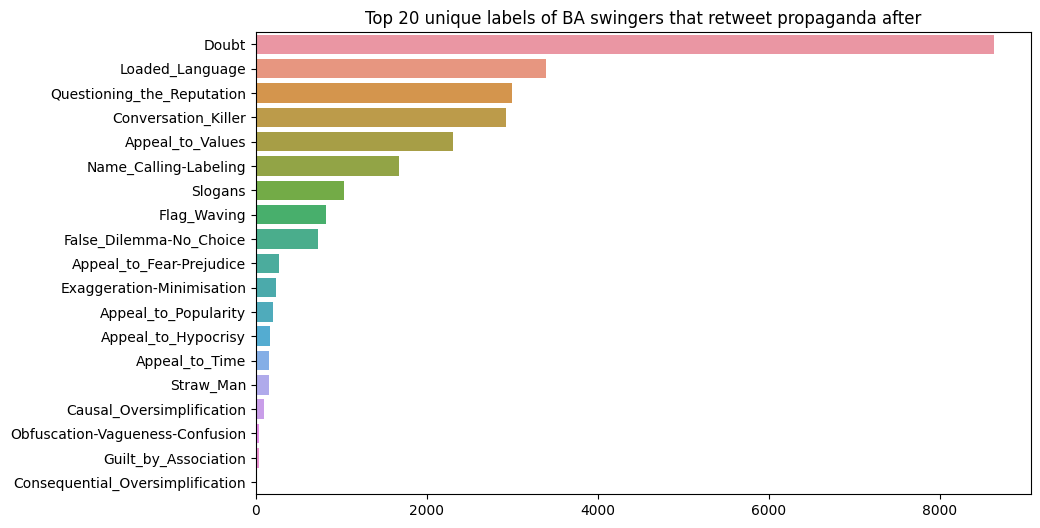

In [332]:
# explode the list of labels and count the occurrences
ba_vulnerable_after_labels = [label for sublist in ba_vulnerable_after_annotations for label in sublist[1]]
ba_vulnerable_after_labels_count = pd.Series(ba_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_after_labels_count[:20], y=ba_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda after')
plt.show()

# Focus on specific types of swingers

In [5]:
norealswing = pd.read_csv('../../../data/norealswing.csv')
nantoparty = pd.read_csv('../../../data/nantoparty.csv')
partytonan = pd.read_csv('../../../data/partytonan.csv')
soft_swing = pd.read_csv('../../../data/soft_swing.csv')
hard_swing = pd.read_csv('../../../data/hard_swing.csv')

## Hard swing

### Before-during

In [77]:
swingtype = hard_swing
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "hard swingers"

In [78]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [79]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 576


In [80]:
swingers_swingtype["pattern"].value_counts()

FdI->PD                108
L;Az-Iv->PD;AVS        100
PD;AVS->Az-Iv           76
PD;AVS->FdI;M5s         64
M5s->PD;AVS             61
FdI->PD;AVS             39
M5s->PD                 34
FdI->Az-Iv              32
L;FdI->Az-Iv            20
L;FdI->PD               15
L;Az-Iv->PD             13
M5s->NM;FI;FdI;PD;L      8
L;FdI->PD;AVS            4
FI->PD                   1
FI->Az-Iv                1
Name: pattern, dtype: int64

In [81]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


In [82]:
len(swingers_swingtype["user"].values)

576

Most retweeted techniques, comparison before and during

In [83]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [84]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [85]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 55


In [86]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 77
Unique number of vulnerable users post: 68


In [87]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [45]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [88]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [48]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

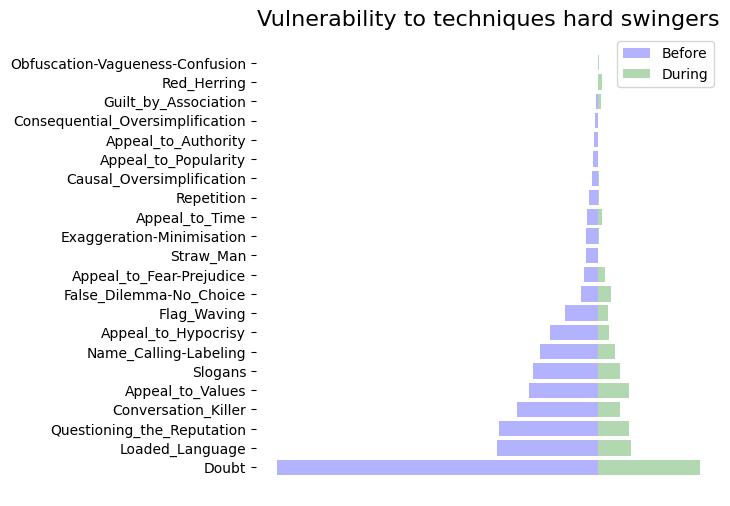

In [91]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [94]:
swingtype = hard_swing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "hard swingers"

In [95]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [96]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 622


In [97]:
swingers_swingtype["pattern"].value_counts()

PD->FdI;Az-Iv          200
Az-Iv->PD;AVS          128
PD;AVS->FdI;Az-Iv       94
FdI;M5s->PD;AVS         88
PD;AVS->M5s             50
Az-Iv->FdI;FI           10
PD->M5s                  9
Az-Iv->L;FdI             9
PD->L;FdI                8
PD->FdI;FI               7
PD;AVS->FdI;FI           6
PD;AVS->L;FdI            5
FdI;M5s->PD;Az-Iv        4
NM;FI;FdI;PD;L->M5s      1
PD;AVS->FdI              1
PD;AVS->NM;FdI           1
Az-Iv->M5s               1
Name: pattern, dtype: int64

In [98]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [99]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [100]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [101]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 123


In [102]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 172
Unique number of vulnerable users post: 180


In [103]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [104]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

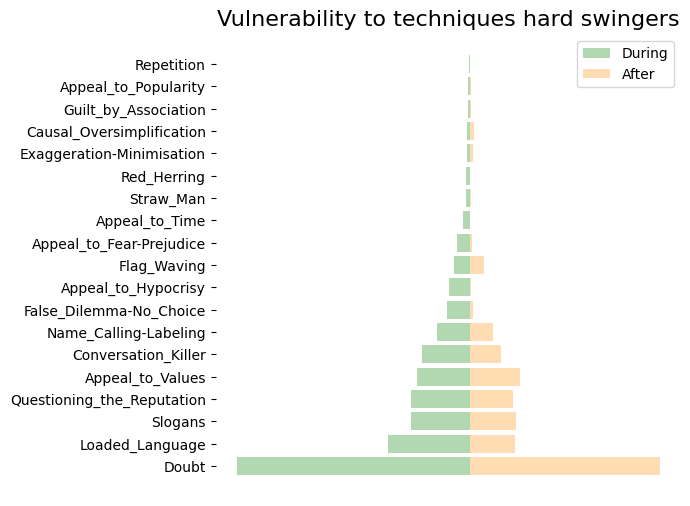

In [105]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-after

In [106]:
swingtype = hard_swing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "hard swingers"

In [107]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [108]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 510


In [109]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->PD;AVS      85
M5s->PD;AVS          81
M5s->FdI;Az-Iv       81
FdI->PD;AVS          76
PD;AVS->FdI;Az-Iv    52
PD;AVS->M5s          52
FdI->PD;Az-Iv        18
L;FdI->PD;Az-Iv      16
FdI->M5s             14
M5s->L;FdI           13
L;FdI->PD;AVS         8
M5s->FdI;FI           4
PD;AVS->L;FdI         2
PD;AVS->NM;FdI        2
L;Az-Iv->M5s          2
M5s->PD;Az-Iv         1
M5s->NM;FdI           1
PD;AVS->FdI;FI        1
FI->PD;Az-Iv          1
Name: pattern, dtype: int64

In [110]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [111]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [112]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [113]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 199


In [114]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 307
Unique number of vulnerable users post: 231


In [115]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [116]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

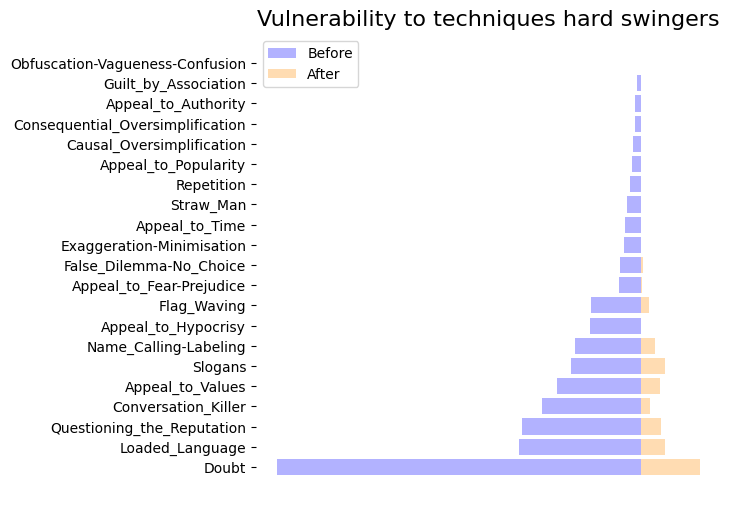

In [117]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

# Soft swing

### Before-during

In [118]:
swingtype = soft_swing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "soft swingers"

In [119]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [120]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 12


In [121]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->FdI;FI    9
FI->L;FdI          2
FI->FdI;Az-Iv      1
Name: pattern, dtype: int64

In [122]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [123]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [124]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [125]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 5


In [126]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 7
Unique number of vulnerable users post: 6


In [127]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [128]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

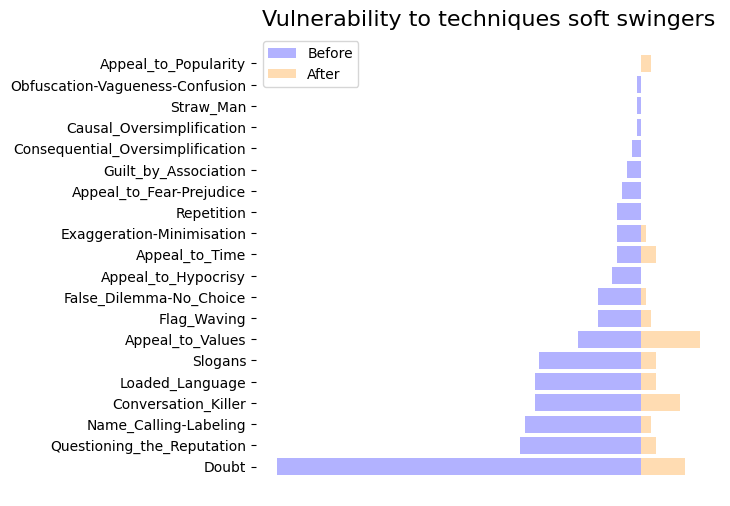

In [129]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [130]:
swingtype = soft_swing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "soft swingers"

In [131]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [132]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 0


### Before-after

In [333]:
swingtype = soft_swing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "soft swingers"

In [334]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [335]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 12


In [137]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->FdI;FI    9
FI->L;FdI          2
FI->FdI;Az-Iv      1
Name: pattern, dtype: int64

In [138]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [139]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [140]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [141]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 5


In [142]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 7
Unique number of vulnerable users post: 6


In [143]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [144]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [145]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

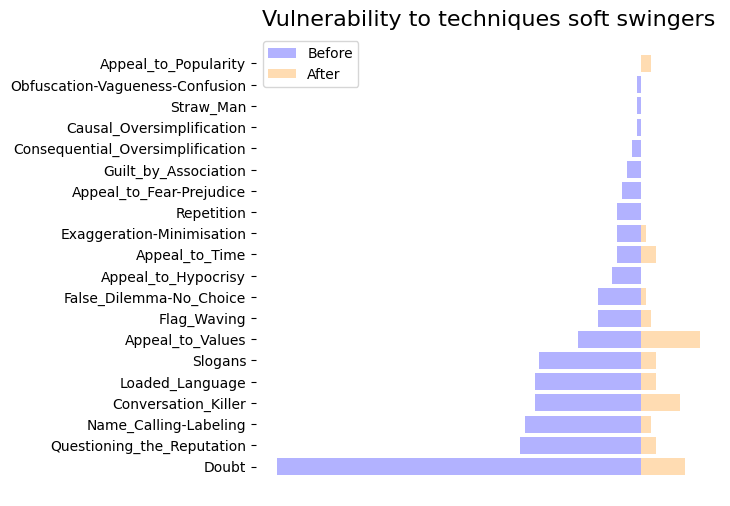

In [146]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

# Nan to party

### Before-during

In [179]:
swingtype = nantoparty
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "nan-to-party"

In [180]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [181]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [183]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 210


In [185]:
swingers_swingtype["pattern"].value_counts()

noparty->NM;FI;FdI;PD;L    161
noparty->FdI;M5s            26
noparty->PD;AVS             12
noparty->PD                  9
noparty->Az-Iv               2
Name: pattern, dtype: int64

In [186]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [187]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [191]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [192]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 13


In [193]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 21
Unique number of vulnerable users post: 16


In [194]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [195]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

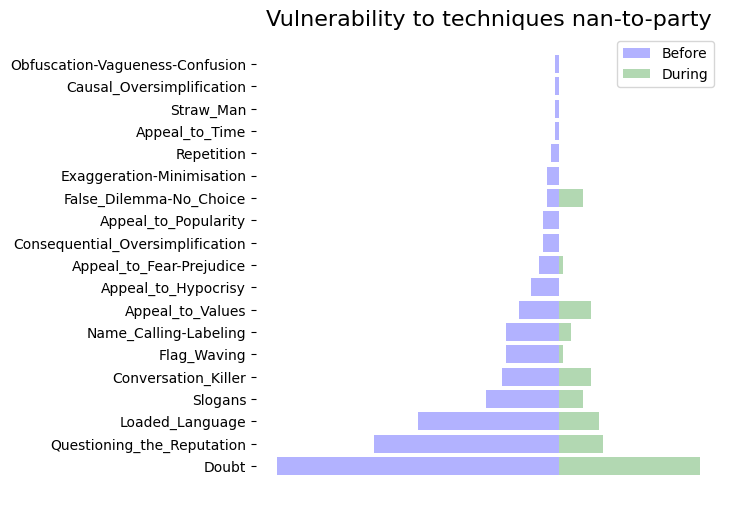

In [196]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [197]:
swingtype = nantoparty
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "nan-to-party"

In [198]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [199]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [200]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 2110


In [201]:
swingers_swingtype["pattern"].value_counts()

noparty->L;FdI        1757
noparty->FdI;Az-Iv     110
noparty->M5s            90
noparty->PD;AVS         87
noparty->FdI;FI         46
noparty->PD;Az-Iv       19
noparty->NM;FdI          1
Name: pattern, dtype: int64

In [202]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [203]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [204]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [205]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 218


In [206]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 346
Unique number of vulnerable users post: 391


In [207]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [208]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

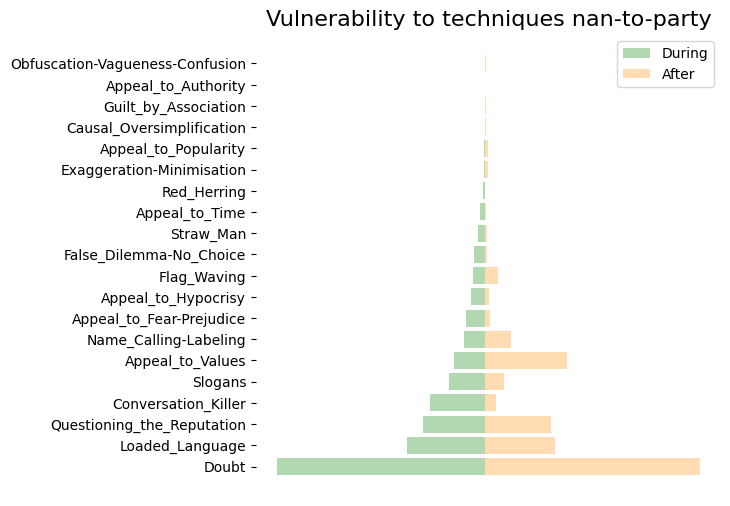

In [209]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-after

In [210]:
swingtype = nantoparty
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "nan-to-party"

In [211]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [212]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [213]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 1170


In [214]:
swingers_swingtype["pattern"].value_counts()

noparty->L;FdI        1046
noparty->FdI;Az-Iv      44
noparty->FdI;FI         30
noparty->PD;AVS         24
noparty->M5s            21
noparty->PD;Az-Iv        5
Name: pattern, dtype: int64

In [215]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [216]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [217]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [218]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 334


In [219]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 593
Unique number of vulnerable users post: 409


In [220]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [221]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

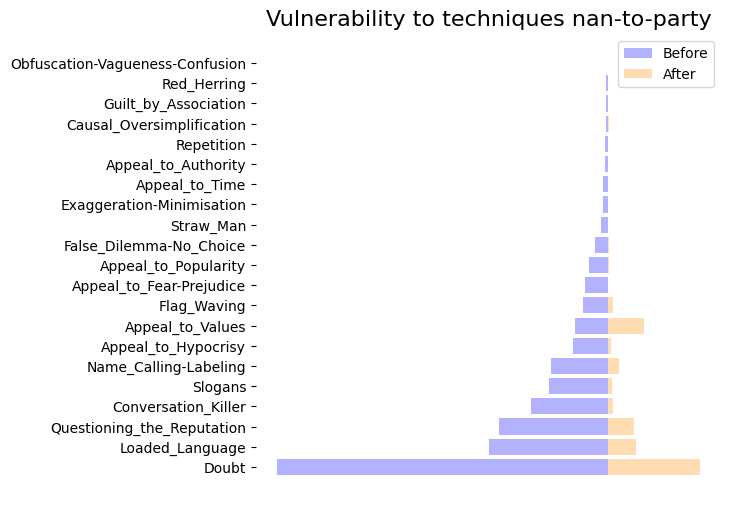

In [222]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

# Party to nan

### Before-during

In [223]:
swingtype = partytonan
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "party-to-nan"

In [224]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [225]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [227]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 382


In [228]:
swingers_swingtype["pattern"].value_counts()

L;FdI->noparty      191
M5s->noparty         81
PD;AVS->noparty      35
L;Az-Iv->noparty     35
FdI->noparty         34
FI->noparty           6
Name: pattern, dtype: int64

In [229]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [230]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [231]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [234]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 21


In [235]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 41
Unique number of vulnerable users post: 27


In [236]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [237]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

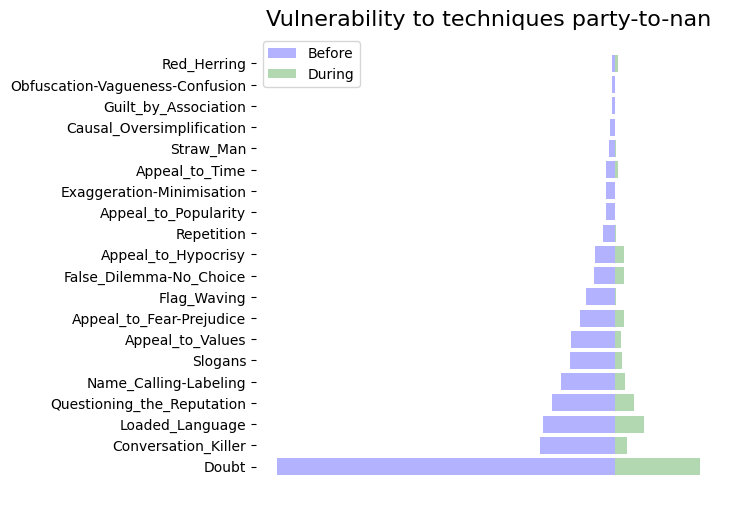

In [238]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [239]:
swingtype = partytonan
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "party-to-nan"

In [240]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [241]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [242]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 47


In [243]:
swingers_swingtype["pattern"].value_counts()

PD;AVS->noparty            22
FdI;M5s->noparty            8
PD->noparty                 8
NM;FI;FdI;PD;L->noparty     6
Az-Iv->noparty              3
Name: pattern, dtype: int64

In [244]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [245]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [246]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [247]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 7


In [248]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 8
Unique number of vulnerable users post: 11


In [249]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [250]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

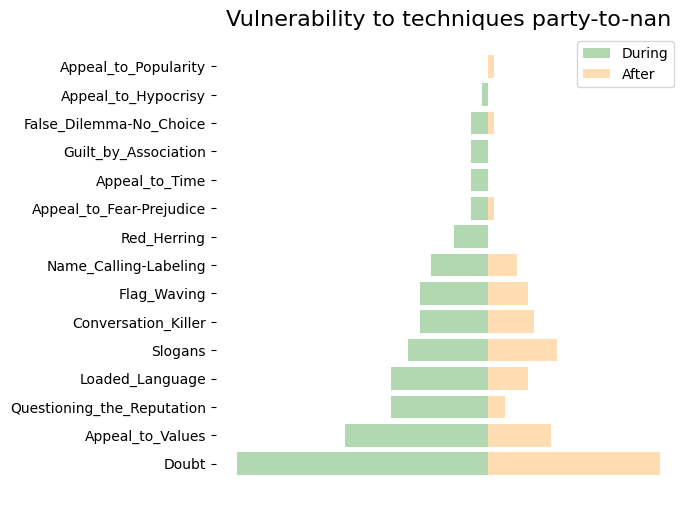

In [251]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-after

In [252]:
swingtype = partytonan
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "party-to-nan"

In [253]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [254]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [255]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 50


In [256]:
swingers_swingtype["pattern"].value_counts()

PD;AVS->noparty     17
M5s->noparty        11
L;FdI->noparty       9
FdI->noparty         5
FI->noparty          5
L;Az-Iv->noparty     3
Name: pattern, dtype: int64

In [257]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [258]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [259]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [260]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 10


In [261]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 16
Unique number of vulnerable users post: 16


In [262]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [263]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

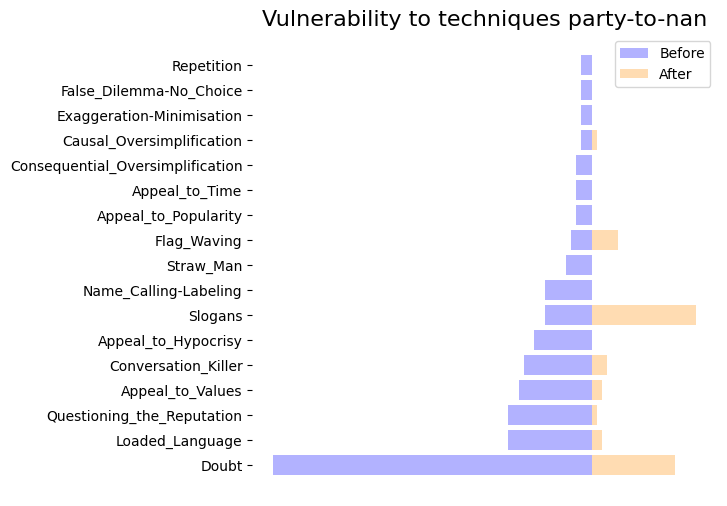

In [264]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

# No real swing

### Before-after

In [265]:
swingtype = norealswing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "no real swing"

In [266]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [267]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [268]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 1957


In [269]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->PD;Az-Iv     1313
L;FdI->FdI;FI          283
FdI->FdI;Az-Iv         122
L;Az-Iv->FdI;Az-Iv      75
PD;AVS->PD;Az-Iv        55
L;FdI->FdI;Az-Iv        37
FI->FdI;FI              33
FdI->FdI;FI             15
FdI->L;FdI              11
L;Az-Iv->L;FdI           8
L;FdI->NM;FdI            5
Name: pattern, dtype: int64

In [270]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [271]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [272]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [273]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 1442


In [274]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 1667
Unique number of vulnerable users post: 1492


In [275]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [276]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

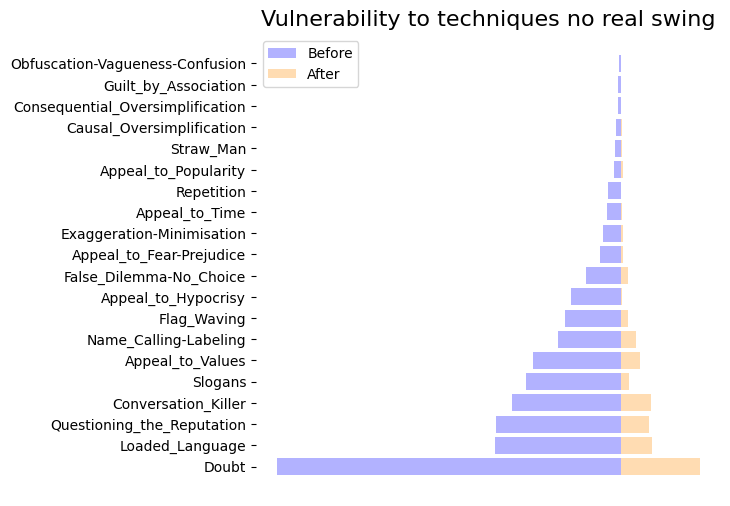

In [277]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-during

In [278]:
swingtype = norealswing
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "no real swing"

In [279]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [280]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [281]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 4151


In [282]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->Az-Iv             1808
M5s->FdI;M5s               1320
L;FdI->NM;FI;FdI;PD;L       914
FI->NM;FI;FdI;PD;L           46
FdI->NM;FI;FdI;PD;L          19
FdI->FdI;M5s                 15
PD;AVS->PD                   13
L;Az-Iv->NM;FI;FdI;PD;L       9
PD;AVS->NM;FI;FdI;PD;L        5
L;FdI->FdI;M5s                2
Name: pattern, dtype: int64

In [283]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [284]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [285]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [286]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 496


In [287]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 665
Unique number of vulnerable users post: 543


In [288]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [289]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

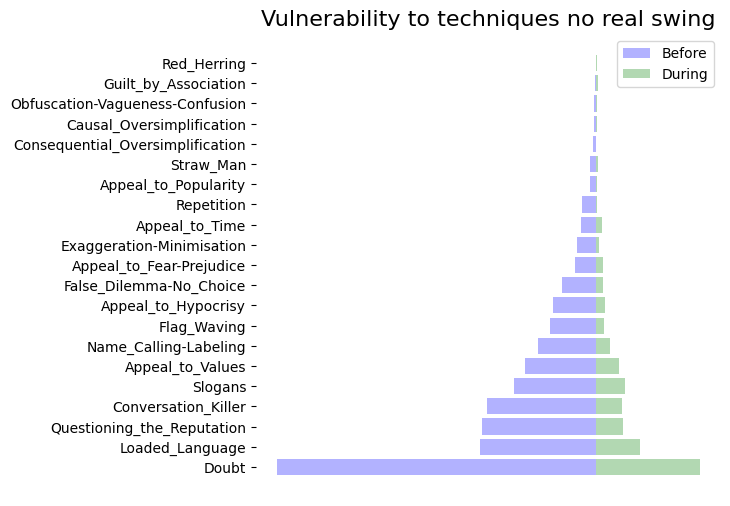

In [290]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [291]:
swingtype = norealswing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "no real swing"

In [292]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [293]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [294]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 5524


In [295]:
swingers_swingtype["pattern"].value_counts()

Az-Iv->PD;Az-Iv              1877
FdI;M5s->M5s                 1551
NM;FI;FdI;PD;L->L;FdI         898
NM;FI;FdI;PD;L->FdI;FI        673
Az-Iv->FdI;Az-Iv              103
PD;AVS->PD;Az-Iv               96
FdI;M5s->FdI;Az-Iv             92
PD->PD;AVS                     91
NM;FI;FdI;PD;L->FdI;Az-Iv      42
NM;FI;FdI;PD;L->PD;AVS         24
FdI;M5s->L;FdI                 24
NM;FI;FdI;PD;L->PD;Az-Iv       20
NM;FI;FdI;PD;L->NM;FdI         17
PD->PD;Az-Iv                    8
FdI;M5s->FdI;FI                 5
FdI;M5s->FdI                    2
FdI;M5s->NM;FdI                 1
Name: pattern, dtype: int64

In [296]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/tmp/ipykernel_32744/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [297]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [298]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [299]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 1830


In [300]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 2128
Unique number of vulnerable users post: 2245


In [301]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [302]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [ ]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

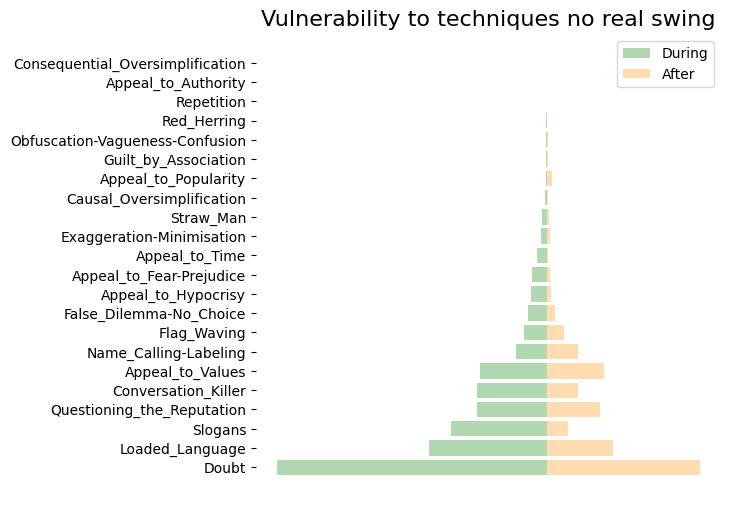

In [303]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
ax.barh(vulnerable_prior_labels_count[:20].index, -vulnerable_prior_labels_count[:20],
        color=colorpre, alpha=0.3, label=pre)
ax.barh(vulnerable_post_labels_count[:20].index, vulnerable_post_labels_count[:20],
        color=colorpost, alpha=0.3, label=post)

# Remove axis labels
ax.set_xticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()